In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('fifa21.csv')
df2= df
name = df['Name']

In [ ]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,...,66.0,61.0,35.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,80.0,57.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,...,50.0,59.0,30.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,...,73.0,79.0,45.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,...,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Real Face',
       'Release Clause', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'GK', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 

In [ ]:
df.shape

(18541, 92)

In [ ]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,Release Clause,Jersey Number,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,1.854100e+04,18541.000000,18541.000000,1.649600e+04,18516.000000,...,18505.000000,17889.000000,16849.000000,18411.000000,18370.000000,18511.000000,18509.000000,18509.000000,18507.000000,18505.000000
mean,9270.000000,218813.779731,25.322636,66.723586,72.187153,2.420461e+06,10088.064290,1624.428618,4.824023e+06,20.452095,...,50.019292,59.603052,47.070687,47.971430,45.847904,15.672087,15.566643,15.552596,15.565246,15.802864
std,5352.470006,38144.535736,4.954431,6.861342,5.786598,5.166395e+06,20474.923541,261.787379,1.041590e+07,16.943162,...,15.733036,11.807557,20.099168,21.486975,21.175411,16.863310,16.177023,16.039980,16.401177,17.134275
min,0.000000,2.000000,16.000000,38.000000,46.000000,0.000000e+00,0.000000,731.000000,5.000000e+03,1.000000,...,7.000000,12.000000,3.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4635.000000,203431.000000,21.000000,62.000000,68.000000,3.500000e+05,1000.000000,1486.000000,6.770000e+05,9.000000,...,40.000000,52.000000,30.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9270.000000,228658.000000,25.000000,67.000000,72.000000,7.500000e+05,3000.000000,1654.000000,1.400000e+06,17.000000,...,51.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13905.000000,243894.000000,29.000000,71.000000,76.000000,2.200000e+06,10000.000000,1805.000000,4.200000e+06,27.000000,...,61.000000,68.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18540.000000,259105.000000,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,2316.000000,2.031000e+08,99.000000,...,94.000000,96.000000,94.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,90.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18541 non-null  int64  
 1   ID                        18541 non-null  int64  
 2   Name                      18541 non-null  object 
 3   Age                       18541 non-null  int64  
 4   Photo                     18541 non-null  object 
 5   Nationality               18541 non-null  object 
 6   Flag                      18541 non-null  object 
 7   Overall                   18541 non-null  int64  
 8   Potential                 18541 non-null  int64  
 9   Club                      18170 non-null  object 
 10  Club Logo                 18541 non-null  object 
 11  Value                     18541 non-null  float64
 12  Wage                      18541 non-null  float64
 13  Special                   18541 non-null  int64  
 14  Prefer

In [ ]:
df.isnull().sum()

Unnamed: 0         0
ID                 0
Name               0
Age                0
Photo              0
                  ..
GK Diving         30
GK Handling       32
GK Kicking        32
GK Positioning    34
GK Reflexes       36
Length: 92, dtype: int64

There are Nan values thus we must clean data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'RM'),
  Text(1, 0, 'ST'),
  Text(2, 0, 'LM'),
  Text(3, 0, 'RW'),
  Text(4, 0, 'LCM'),
  Text(5, 0, 'RS'),
  Text(6, 0, 'RB'),
  Text(7, 0, 'LW'),
  Text(8, 0, 'CM'),
  Text(9, 0, 'CB'),
  Text(10, 0, 'CDM'),
  Text(11, 0, 'CAM'),
  Text(12, 0, 'LB'),
  Text(13, 0, 'RAM'),
  Text(14, 0, 'RCM'),
  Text(15, 0, 'RCB'),
  Text(16, 0, 'RWB'),
  Text(17, 0, 'LDM'),
  Text(18, 0, 'LAM'),
  Text(19, 0, 'LCB'),
  Text(20, 0, 'CF'),
  Text(21, 0, 'LS'),
  Text(22, 0, 'GK'),
  Text(23, 0, 'LWB'),
  Text(24, 0, 'LF'),
  Text(25, 0, 'RDM'),
  Text(26, 0, 'RF')])

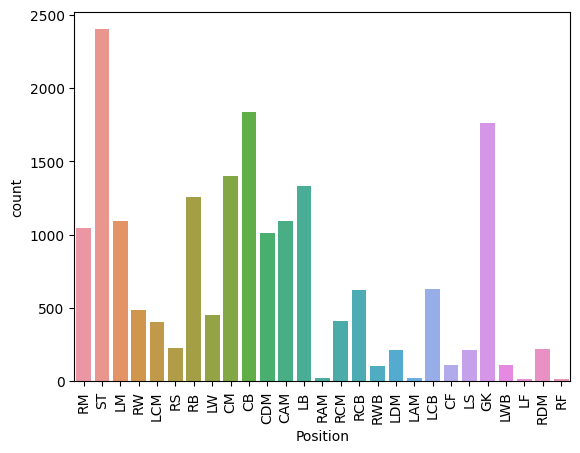

In [ ]:
sns.countplot(x='Position',data=df)
plt.xticks(rotation=90)

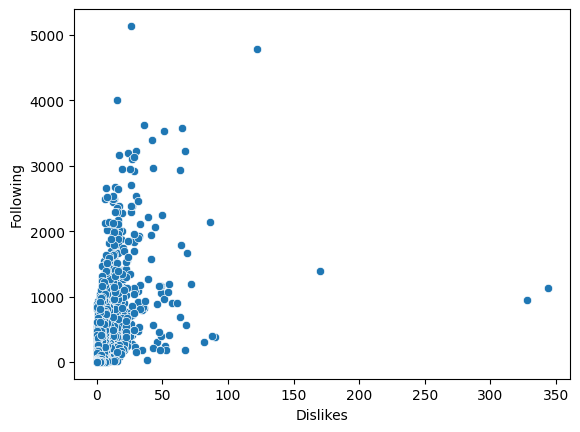

In [ ]:
sns.scatterplot(x="Dislikes", y="Following", data=df);
#As we can see there is a strong positive correlation between number of dislikes and following

We can see what positions our data consists of

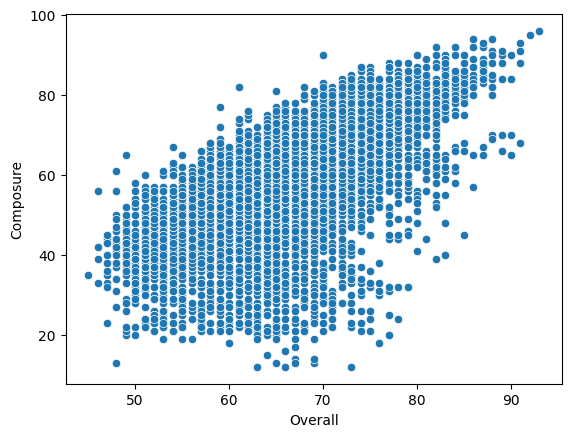

In [ ]:
sns.scatterplot(x="Overall", y="Composure", data=df);

In [ ]:
df=df.drop(columns='Composure')

Text(0, 0.5, 'Transfer Fee in Millions')

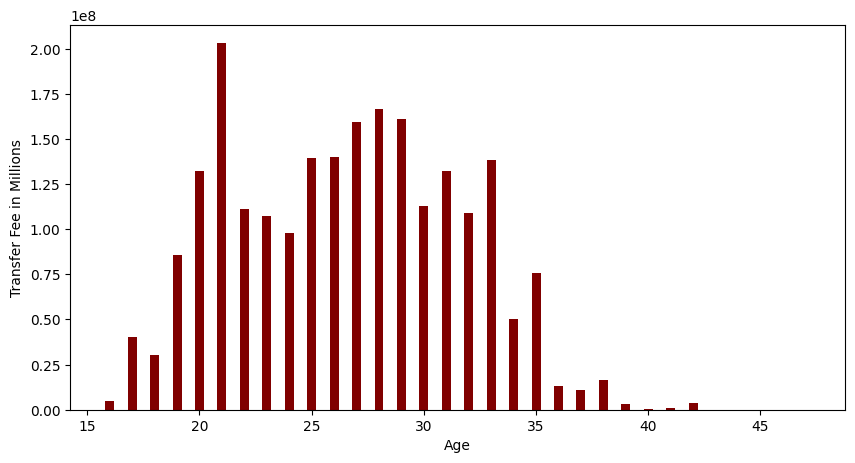

In [ ]:
xval = (df['Age'])
yval = (df['Release Clause'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(xval, yval, color ='maroon',
        width = 0.4)

plt.xlabel('Age')
plt.ylabel('Transfer Fee in Millions')

In [ ]:
player = str(input('Input Player you want to replace: '))
count = False
for i in df['Name']:
  if i == player:
    count = True
    break

if not count:
  print('Player not in database')
  player = str(input('Input Player you want to replace: '))

Input Player you want to replace: Edinson Cavani


In [ ]:
pos = ""
for rows in df.iterrows():
  if rows[1]['Name']==player:
    pos = rows[1]['Position']
    break
print(pos)


ST


In [ ]:
#from sklearn.preprocessing import StandardScaler
# create a StandardScaler object
#scaler = StandardScaler()

#df['Likes'] = scaler.fit_transform(df[['Likes']])
#df['Disikes'] = scaler.fit_transform(df[['Dislikes']])
#print(df)

In [ ]:
forward = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM']
goalkeeper = ['GK']
defender = ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
midfielder = ['LM','LCM','CM','RCM','RM']


In [ ]:
temp_col = []
for pos in df['Position']:
  if pos in forward:
    temp_col.append('F')
  elif pos in defender:
    temp_col.append('D')
  elif pos in goalkeeper:
    temp_col.append('G')
  else:
    temp_col.append('M')


df.drop(['Position'], axis=1, inplace = True)
df["Position"] = temp_col
df


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,...,66.0,35.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0,M
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,57.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0,F
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,...,50.0,30.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0,M
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,...,73.0,45.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0,F
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,...,81.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,18536,5594,Rémy Vercoutre,37,https://cdn.sofifa.com/players/005/594/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,77,77,Stade Malherbe Caen,...,23.0,NaN,11.0,11.0,76.0,76.0,77.0,77.0,77.0,G
18537,18537,3395,Shaun Wright-Phillips,34,https://cdn.sofifa.com/players/003/395/17_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,68,68,New York Red Bulls,...,64.0,NaN,27.0,33.0,14.0,9.0,14.0,11.0,12.0,M
18538,18538,388,Sol Campbell,35,https://cdn.sofifa.com/players/000/388/11_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,75,79,Newcastle United,...,37.0,NaN,77.0,73.0,11.0,7.0,12.0,5.0,9.0,D
18539,18539,2956,Stiliyan Petrov,32,https://cdn.sofifa.com/players/002/956/13_60.png,Bulgaria,https://cdn.sofifa.com/flags/bg.png,76,76,Aston Villa,...,67.0,NaN,62.0,70.0,9.0,9.0,7.0,9.0,15.0,M


In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'object':
      df[col].replace(np.nan,df[col].mode,inplace=True)
    else:
      df[col].replace(np.nan,round(df[col].mean(),3),inplace=True)
df.isnull().sum()
numerical = []

for col in df.columns:
  if df[col].dtype == 'float64' or 'int64':
    numerical.append(col)

In [ ]:
for rows in df.iterrows():
  if rows[1]['Position']==player:
    pos = rows[1]['Position']
print(pos)


LCB


In [ ]:


from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df["Position"]= label_encoder.fit_transform(df['Position'])

df['Position'].unique()
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,...,66.0,35.000,11.0,18.0,9.0,12.0,7.0,8.0,7.0,3
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,57.000,48.0,39.0,12.0,5.0,13.0,13.0,10.0,1
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,...,50.0,30.000,23.0,24.0,10.0,13.0,14.0,12.0,7.0,3
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,...,73.0,45.000,54.0,38.0,8.0,7.0,13.0,8.0,14.0,1
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,...,81.0,52.000,41.0,44.0,15.0,15.0,15.0,5.0,14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,18536,5594,Rémy Vercoutre,37,https://cdn.sofifa.com/players/005/594/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,77,77,Stade Malherbe Caen,...,23.0,47.071,11.0,11.0,76.0,76.0,77.0,77.0,77.0,2
18537,18537,3395,Shaun Wright-Phillips,34,https://cdn.sofifa.com/players/003/395/17_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,68,68,New York Red Bulls,...,64.0,47.071,27.0,33.0,14.0,9.0,14.0,11.0,12.0,3
18538,18538,388,Sol Campbell,35,https://cdn.sofifa.com/players/000/388/11_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,75,79,Newcastle United,...,37.0,47.071,77.0,73.0,11.0,7.0,12.0,5.0,9.0,0
18539,18539,2956,Stiliyan Petrov,32,https://cdn.sofifa.com/players/002/956/13_60.png,Bulgaria,https://cdn.sofifa.com/flags/bg.png,76,76,Aston Villa,...,67.0,47.071,62.0,70.0,9.0,9.0,7.0,9.0,15.0,3


In [ ]:
df.columns
for i in df.columns:
  if i != "Name":
    if df[i].dtype== 'object':
      df.drop([i], axis=1, inplace = True)



#df.drop('Release Clause', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           18541 non-null  int64  
 1   ID                   18541 non-null  int64  
 2   Name                 18541 non-null  object 
 3   Age                  18541 non-null  int64  
 4   Overall              18541 non-null  int64  
 5   Potential            18541 non-null  int64  
 6   Value                18541 non-null  float64
 7   Wage                 18541 non-null  float64
 8   Special              18541 non-null  int64  
 9   Release Clause       18541 non-null  float64
 10  Jersey Number        18541 non-null  float64
 11  Likes                18541 non-null  int64  
 12  Dislikes             18541 non-null  int64  
 13  Following            18541 non-null  int64  
 14  Crossing             18541 non-null  float64
 15  Finishing            18541 non-null 

In [ ]:
corr = df.corr(method ='pearson')
print(corr)

                     Unnamed: 0        ID       Age   Overall  Potential  \
Unnamed: 0             1.000000 -0.104625  0.145874 -0.445338  -0.656116   
ID                    -0.104625  1.000000 -0.740295 -0.425691   0.042908   
Age                    0.145874 -0.740295  1.000000  0.517018  -0.233716   
Overall               -0.445338 -0.425691  0.517018  1.000000   0.595419   
Potential             -0.656116  0.042908 -0.233716  0.595419   1.000000   
Value                 -0.440239 -0.086812  0.091327  0.623419   0.559097   
Wage                  -0.374490 -0.218413  0.197727  0.587519   0.460039   
Special               -0.308737 -0.234334  0.280649  0.609103   0.331760   
Release Clause        -0.425163 -0.096073  0.083397  0.601068   0.552783   
Jersey Number          0.028588  0.150302 -0.234190 -0.212813   0.012620   
Likes                 -0.370398 -0.036917 -0.035281  0.378545   0.443518   
Dislikes              -0.261362 -0.085286  0.038159  0.308863   0.318278   
Following   

In [ ]:
df

,Unnamed: 0,ID,Name,Age,Overall,Potential,Value,Wage,Special,Release Clause,...,Penalties,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,0,253283,Facundo Pellistri,18,71,87,4900000.0,500.0,1729,1.380000e+07,...,66.0,35.000,11.0,18.0,9.0,12.0,7.0,8.0,7.0,3
1,1,179813,Edinson Cavani,32,86,86,35500000.0,150000.0,2144,6.570000e+07,...,85.0,57.000,48.0,39.0,12.0,5.0,13.0,13.0,10.0,1
2,2,245541,Giovanni Reyna,17,68,87,1800000.0,2000.0,1671,4.200000e+06,...,50.0,30.000,23.0,24.0,10.0,13.0,14.0,12.0,7.0,3
3,3,233419,Raphael Dias Belloli,23,81,85,23000000.0,50000.0,2071,4.540000e+07,...,73.0,45.000,54.0,38.0,8.0,7.0,13.0,8.0,14.0,1
4,4,198710,James Rodríguez,28,82,82,22500000.0,105000.0,2099,4.280000e+07,...,81.0,52.000,41.0,44.0,15.0,15.0,15.0,5.0,14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,18536,5594,Rémy Vercoutre,37,77,77,600000.0,15000.0,1086,1.200000e+06,...,23.0,47.071,11.0,11.0,76.0,76.0,77.0,77.0,77.0,2
18537,18537,3395,Shaun Wright-Phillips,34,68,68,425000.0,6000.0,1744,4.824023e+06,...,64.0,47.071,27.0,33.0,14.0,9.0,14.0,11.0,12.0,3
18538,18538,388,Sol Campbell,35,75,79,0.0,0.0,1581,4.824023e+06,...,37.0,47.071,77.0,73.0,11.0,7.0,12.0,5.0,9.0,0
18539,18539,2956,Stiliyan Petrov,32,76,76,2200000.0,20000.0,1920,4.824023e+06,...,67.0,47.071,62.0,70.0,9.0,9.0,7.0,9.0,15.0,3


In [ ]:
cor = np.array(corr).flatten()
corel=[]
for i in cor:
  j = abs(i)
  if j == 1:
    j=0
  corel.append(j)

In [ ]:
index = []
max(corel)
index.append(corel.index(max(corel)))
print(index)


[243]


In [ ]:
corr.shape


(47, 47)

In [ ]:
corel.index(max(corel))

243

2D--1D.  Eg 191st index in a (46,46) lies in the (4,7)

In [ ]:
y = df["Name"]


In [ ]:
x=df

In [ ]:
x
x.drop("Unnamed: 0", axis = 1, inplace = True)
x

,ID,Name,Age,Overall,Potential,Value,Wage,Special,Release Clause,Jersey Number,...,Penalties,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,253283,Facundo Pellistri,18,71,87,4900000.0,500.0,1729,1.380000e+07,10.0,...,66.0,35.000,11.0,18.0,9.0,12.0,7.0,8.0,7.0,3
1,179813,Edinson Cavani,32,86,86,35500000.0,150000.0,2144,6.570000e+07,9.0,...,85.0,57.000,48.0,39.0,12.0,5.0,13.0,13.0,10.0,1
2,245541,Giovanni Reyna,17,68,87,1800000.0,2000.0,1671,4.200000e+06,32.0,...,50.0,30.000,23.0,24.0,10.0,13.0,14.0,12.0,7.0,3
3,233419,Raphael Dias Belloli,23,81,85,23000000.0,50000.0,2071,4.540000e+07,7.0,...,73.0,45.000,54.0,38.0,8.0,7.0,13.0,8.0,14.0,1
4,198710,James Rodríguez,28,82,82,22500000.0,105000.0,2099,4.280000e+07,10.0,...,81.0,52.000,41.0,44.0,15.0,15.0,15.0,5.0,14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,5594,Rémy Vercoutre,37,77,77,600000.0,15000.0,1086,1.200000e+06,1.0,...,23.0,47.071,11.0,11.0,76.0,76.0,77.0,77.0,77.0,2
18537,3395,Shaun Wright-Phillips,34,68,68,425000.0,6000.0,1744,4.824023e+06,98.0,...,64.0,47.071,27.0,33.0,14.0,9.0,14.0,11.0,12.0,3
18538,388,Sol Campbell,35,75,79,0.0,0.0,1581,4.824023e+06,5.0,...,37.0,47.071,77.0,73.0,11.0,7.0,12.0,5.0,9.0,0
18539,2956,Stiliyan Petrov,32,76,76,2200000.0,20000.0,1920,4.824023e+06,19.0,...,67.0,47.071,62.0,70.0,9.0,9.0,7.0,9.0,15.0,3


In [ ]:
x.drop("Name", axis = 1, inplace = True)
print(x)

           ID  Age  Overall  Potential       Value      Wage  Special  \
0      253283   18       71         87   4900000.0     500.0     1729   
1      179813   32       86         86  35500000.0  150000.0     2144   
2      245541   17       68         87   1800000.0    2000.0     1671   
3      233419   23       81         85  23000000.0   50000.0     2071   
4      198710   28       82         82  22500000.0  105000.0     2099   
...       ...  ...      ...        ...         ...       ...      ...   
18536    5594   37       77         77    600000.0   15000.0     1086   
18537    3395   34       68         68    425000.0    6000.0     1744   
18538     388   35       75         79         0.0       0.0     1581   
18539    2956   32       76         76   2200000.0   20000.0     1920   
18540    1983   35       67         67    110000.0    6000.0     1413   

       Release Clause  Jersey Number  Likes  ...  Penalties  \
0        1.380000e+07           10.0     91  ...       66.0 

In [ ]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

potential_replacements = []
def predict_best_replacements(args, k=7, norm=2):
    knn = NearestNeighbors(n_neighbors=k, p=norm)
    knn.fit(x)
    for player in args:
        replacements = []
        ind = y[y == player].index[0]
        neighbors = knn.kneighbors(x.iloc[ind,:].values.reshape(1, -1))[1][0]
        for n in neighbors:
            replacements.append(y[n])
            potential_replacements.append(y[n])
        print('Player: ', player, ', Replacements: ', ", ".join(replacements[1:]))

In [ ]:
print(predict_best_replacements([player],7))

Player:  Edinson Cavani , Replacements:  Gabriel Fernando de Jesus, Raphaël Guerreiro, Jordan Henderson, Bernd Leno, Dele Alli, Niklas Süle
None


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
print(potential_replacements)

['Edinson Cavani', 'Gabriel Fernando de Jesus', 'Raphaël Guerreiro', 'Jordan Henderson', 'Bernd Leno', 'Dele Alli', 'Niklas Süle']


THESE ARE THE 5 OPTIMAL PLAYERS TO REPLACE YOUR MANS


In [ ]:
df

,ID,Age,Overall,Potential,Value,Wage,Special,Release Clause,Jersey Number,Likes,...,Penalties,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,253283,18,71,87,4900000.0,500.0,1729,1.380000e+07,10.0,91,...,66.0,35.000,11.0,18.0,9.0,12.0,7.0,8.0,7.0,3
1,179813,32,86,86,35500000.0,150000.0,2144,6.570000e+07,9.0,74,...,85.0,57.000,48.0,39.0,12.0,5.0,13.0,13.0,10.0,1
2,245541,17,68,87,1800000.0,2000.0,1671,4.200000e+06,32.0,144,...,50.0,30.000,23.0,24.0,10.0,13.0,14.0,12.0,7.0,3
3,233419,23,81,85,23000000.0,50000.0,2071,4.540000e+07,7.0,84,...,73.0,45.000,54.0,38.0,8.0,7.0,13.0,8.0,14.0,1
4,198710,28,82,82,22500000.0,105000.0,2099,4.280000e+07,10.0,292,...,81.0,52.000,41.0,44.0,15.0,15.0,15.0,5.0,14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,5594,37,77,77,600000.0,15000.0,1086,1.200000e+06,1.0,3,...,23.0,47.071,11.0,11.0,76.0,76.0,77.0,77.0,77.0,2
18537,3395,34,68,68,425000.0,6000.0,1744,4.824023e+06,98.0,3,...,64.0,47.071,27.0,33.0,14.0,9.0,14.0,11.0,12.0,3
18538,388,35,75,79,0.0,0.0,1581,4.824023e+06,5.0,3,...,37.0,47.071,77.0,73.0,11.0,7.0,12.0,5.0,9.0,0
18539,2956,32,76,76,2200000.0,20000.0,1920,4.824023e+06,19.0,0,...,67.0,47.071,62.0,70.0,9.0,9.0,7.0,9.0,15.0,3


In [ ]:
df["ID"].dtype

dtype('int64')

In [ ]:
import plotly.graph_objects as go

In [ ]:
!pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:299: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


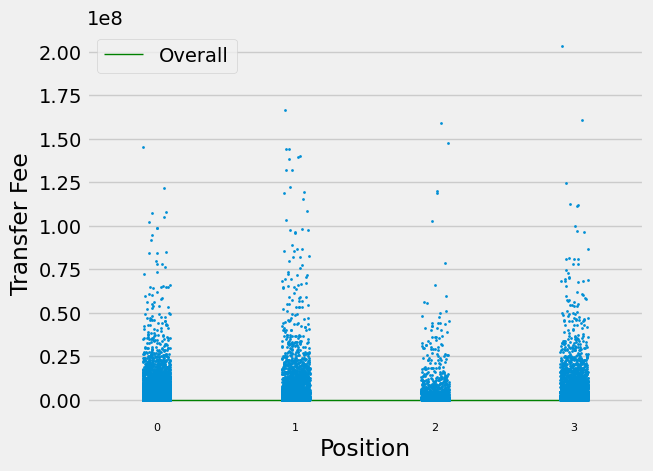

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig, ax = plt.subplots()
df.groupby('Position')['Overall'].quantile(.75).plot(linewidth = 1.0,color = 'g')
sns.stripplot(x = 'Position',y='Release Clause',\
              cmap = 'coolwarm',data= df,size = 2,)
plt.xlabel('Position')
plt.ylabel('Transfer Fee')
plt.xticks(fontsize = 8)
ax.annotate(text = 'Ronaldo',xy = (9,95),xycoords = 'data',\
            xytext = (0,25),textcoords = 'offset points', arrowprops = dict(arrowstyle ='->', color = 'black'))
ax.annotate(text ='Neymar', xy = (17,220),xycoords = 'data',\
            xytext = (0,-50),textcoords = 'offset points',arrowprops = dict(arrowstyle = '->',color = 'black'))
plt.show()

legend:
d-0;
f-1;
g-2;
m-3




Text(0, 0.5, 'Transfer Fee in Millions')

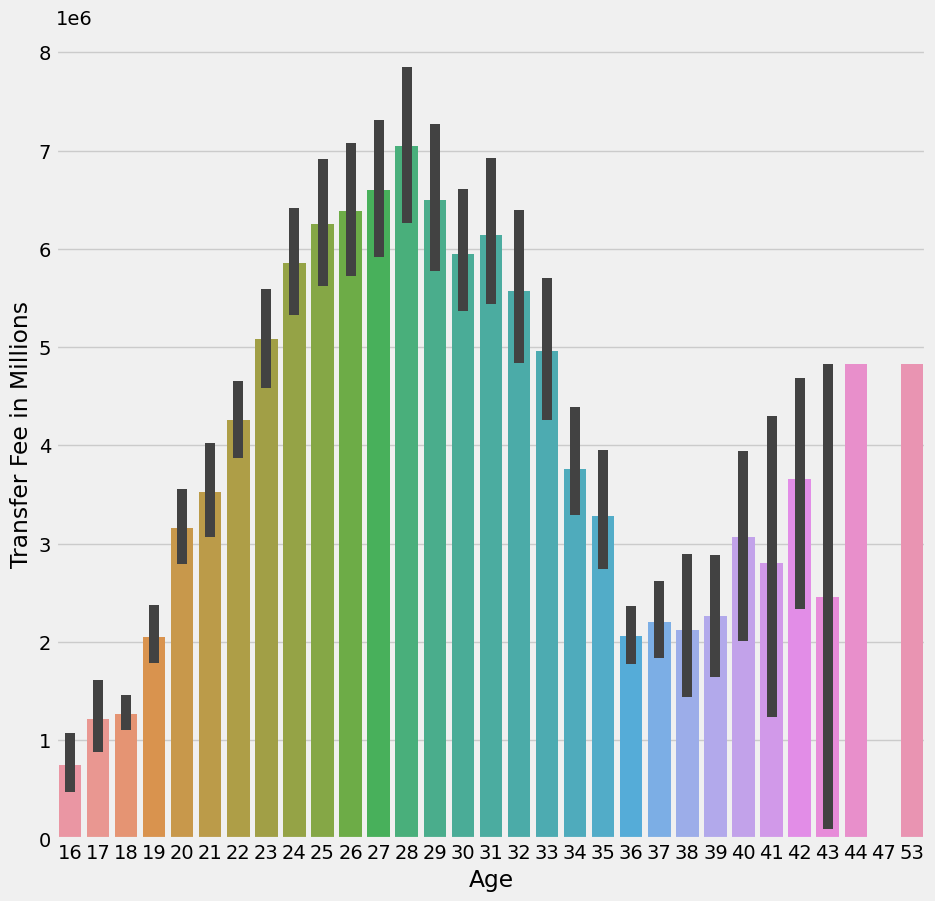

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Age',y='Release Clause',data = df)

plt.xlabel('Age')
plt.ylabel('Transfer Fee in Millions')

Text(0.5, 44.000000000000014, 'Overall')

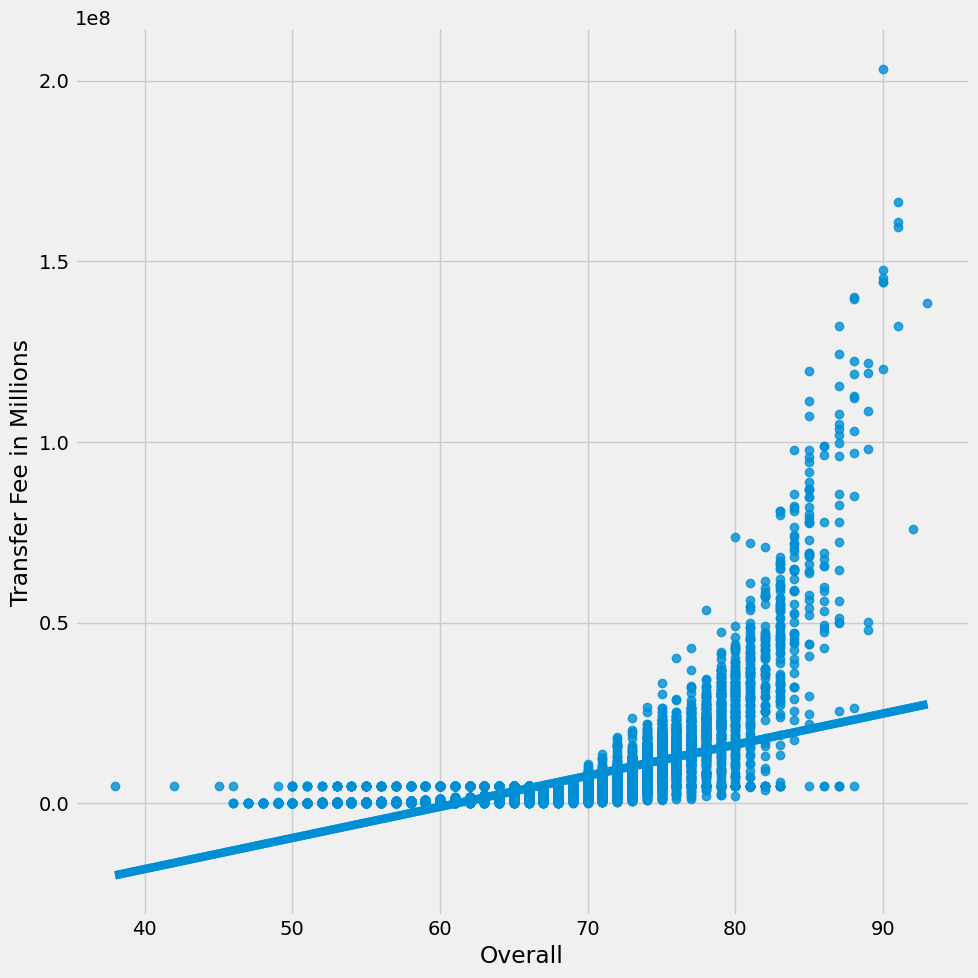

In [ ]:
sns.lmplot(x='Overall',y='Release Clause',data=df, ci = None,height = 10)
sns.regplot(x='Overall',y='Release Clause',data=df, ci = None, scatter = None, label ='Aggregated transfers')
plt.ylabel('Transfer Fee in Millions')
plt.xlabel('Overall')

In [ ]:
ig = go.Figure(go.Treemap(
    labels=df2['ID'], #Show the name of each rectangle
    parents=df2['Name'], #Define the hierarchy
    values=df2['Overall'], #Define the area/size of each rectangle
    branchvalues='total', #When set to "total", items in values are taken to be value of all its descendants
    textinfo = "label", #Define what to show as the label for each rectangle
    pathbar_textfont_size=15,
    marker=dict(
         #Use 'color' column for continuous color scale
        colorscale='oranges',
    ),
    hovertemplate='<b>%{label} </b> <br> <br> Quit Rate: %{color:.1f}%<br>', #Define what and how the hover text is shown
    name=''
    ))

fig.show()
plt.show()

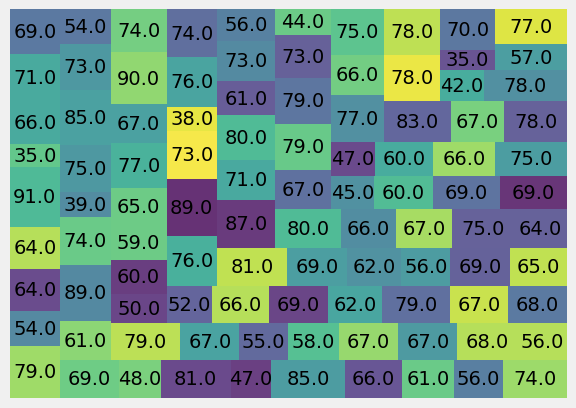

In [ ]:
# plot it
squarify.plot(sizes=df['Strength'][1:100], label=df['Strength'][1:100], alpha=.8 )
plt.axis('off')
plt.show()


In [ ]:

# importing packages
#import seaborn
#import matplotlib.pyplot as plt

############# Main Section ############
# loading dataset using seaborn

#seaborn.pairplot(df_new)
# to show
#plt.show()


In [ ]:
list = []
list = df2.corr()
print(list)

                     Unnamed: 0        ID       Age   Overall  Potential  \
Unnamed: 0             1.000000 -0.104625  0.145874 -0.445338  -0.656116   
ID                    -0.104625  1.000000 -0.740295 -0.425691   0.042908   
Age                    0.145874 -0.740295  1.000000  0.517018  -0.233716   
Overall               -0.445338 -0.425691  0.517018  1.000000   0.595419   
Potential             -0.656116  0.042908 -0.233716  0.595419   1.000000   
Value                 -0.440239 -0.086812  0.091327  0.623419   0.559097   
Wage                  -0.374490 -0.218413  0.197727  0.587519   0.460039   
Special               -0.308737 -0.234334  0.280649  0.609103   0.331760   
Release Clause        -0.457372 -0.124140  0.090445  0.634044   0.587957   
Jersey Number          0.028611  0.151217 -0.234494 -0.213141   0.012651   
Likes                 -0.370398 -0.036917 -0.035281  0.378545   0.443518   
Dislikes              -0.261362 -0.085286  0.038159  0.308863   0.318278   
Following   

In [ ]:
print(list['Release Clause'].abs().sort_values())


GK Handling            0.000057
GK Diving              0.000227
GK Kicking             0.001218
GK Reflexes            0.001478
GK Positioning         0.001803
Age                    0.090445
Jersey Number          0.097458
Sliding Tackle         0.107225
Balance                0.121307
ID                     0.124140
Standing Tackle        0.127514
Jumping                0.128062
Strength               0.132601
Interceptions          0.155640
Defensive Awareness    0.157541
Acceleration           0.164165
Sprint Speed           0.169003
Heading Accuracy       0.171369
Agility                0.188095
Aggression             0.191583
Penalties              0.208461
Stamina                0.224181
Finishing              0.234541
FK Accuracy            0.238089
Positioning            0.247598
Crossing               0.251328
Volleys                0.255965
Long Shots             0.259264
Dribbling              0.262598
Curve                  0.277489
Ball Control           0.297449
Long Pas

In [ ]:
df2.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,Release Clause,Jersey Number,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
Unnamed: 0,1.000000,-0.104625,0.145874,-0.445338,-0.656116,-0.440239,-0.374490,-0.308737,-0.457372,0.028611,...,-0.150245,-0.344605,-0.128539,-0.102757,-0.089183,0.051926,0.057270,0.065784,0.051854,0.056876
ID,-0.104625,1.000000,-0.740295,-0.425691,0.042908,-0.086812,-0.218413,-0.234334,-0.124140,0.151217,...,-0.217623,-0.416376,-0.141794,-0.072625,-0.056909,-0.081618,-0.092488,-0.117790,-0.099722,-0.087110
Age,0.145874,-0.740295,1.000000,0.517018,-0.233716,0.091327,0.197727,0.280649,0.090445,-0.234494,...,0.198634,0.418508,0.165448,0.107920,0.088251,0.113947,0.118203,0.125646,0.127745,0.115057
Overall,-0.445338,-0.425691,0.517018,1.000000,0.595419,0.623419,0.587519,0.609103,0.634044,-0.213141,...,0.322538,0.704367,0.303523,0.240288,0.213117,0.027722,0.026762,0.030835,0.035451,0.028121
Potential,-0.656116,0.042908,-0.233716,0.595419,1.000000,0.559097,0.460039,0.331760,0.587957,0.012651,...,0.153030,0.370485,0.152734,0.139364,0.130999,-0.012013,-0.012768,-0.006019,-0.008533,-0.011295
Value,-0.440239,-0.086812,0.091327,0.623419,0.559097,1.000000,0.821104,0.388311,0.993741,-0.095684,...,0.201041,0.443035,0.157467,0.124479,0.104553,0.000223,-0.001245,-0.005928,0.000186,0.000275
Wage,-0.374490,-0.218413,0.197727,0.587519,0.460039,0.821104,1.000000,0.375005,0.830202,-0.083450,...,0.216946,0.430265,0.167810,0.143606,0.124951,-0.010187,-0.012527,-0.017028,-0.011135,-0.012340
Special,-0.308737,-0.234334,0.280649,0.609103,0.331760,0.388311,0.375005,1.000000,0.389025,-0.124830,...,0.712627,0.789732,0.561953,0.520002,0.486981,-0.630102,-0.633317,-0.626602,-0.626928,-0.632794
Release Clause,-0.457372,-0.124140,0.090445,0.634044,0.587957,0.993741,0.830202,0.389025,1.000000,-0.097458,...,0.208461,0.443132,0.157541,0.127514,0.107225,-0.000227,0.000057,-0.001218,0.001803,0.001478
Jersey Number,0.028611,0.151217,-0.234494,-0.213141,0.012651,-0.095684,-0.083450,-0.124830,-0.097458,1.000000,...,-0.027163,-0.147874,-0.131169,-0.109072,-0.100631,-0.010489,-0.011793,-0.015512,-0.015732,-0.011411


In [ ]:
attributes = ['Value','Wage','Likes','Following','Overall','Potential','Reactions']

In [ ]:
df2 = pd.read_csv('fifa21.csv')
for col in df2.columns:
  if df2[col].isnull().sum() > 0:
    if df2[col].dtype == 'object':
      df2[col].replace(np.nan,df2[col].mode,inplace=True)
    else:
      df2[col].replace(np.nan,round(df2[col].mean(),3),inplace=True)
df2.isnull().sum()
numerical = []

for col in df2.columns:
  if df2[col].dtype == 'float64' or 'int64':
    numerical.append(col)

In [ ]:
df2

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,...,66.0,61.000,35.000,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,80.000,57.000,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,...,50.0,59.000,30.000,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,...,73.0,79.000,45.000,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,...,81.0,87.000,52.000,41.0,44.0,15.0,15.0,15.0,5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,18536,5594,Rémy Vercoutre,37,https://cdn.sofifa.com/players/005/594/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,77,77,Stade Malherbe Caen,...,23.0,20.000,47.071,11.0,11.0,76.0,76.0,77.0,77.0,77.0
18537,18537,3395,Shaun Wright-Phillips,34,https://cdn.sofifa.com/players/003/395/17_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,68,68,New York Red Bulls,...,64.0,70.000,47.071,27.0,33.0,14.0,9.0,14.0,11.0,12.0
18538,18538,388,Sol Campbell,35,https://cdn.sofifa.com/players/000/388/11_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,75,79,Newcastle United,...,37.0,59.603,47.071,77.0,73.0,11.0,7.0,12.0,5.0,9.0
18539,18539,2956,Stiliyan Petrov,32,https://cdn.sofifa.com/players/002/956/13_60.png,Bulgaria,https://cdn.sofifa.com/flags/bg.png,76,76,Aston Villa,...,67.0,59.603,47.071,62.0,70.0,9.0,9.0,7.0,9.0,15.0


In [ ]:
df_player = []
df_player = df2[df2.Name == player]
df_player

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,...,85.0,80.0,57.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0


In [ ]:
df2 = df2[df2.Name!= player]

In [ ]:
df2.shape

(18540, 92)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[attributes], df['Release Clause'], test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14832, 7)
(3709, 7)
(14832,)
(3709,)


In [ ]:
lr = LinearRegression()
fit = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

coef = lr.coef_
mse = mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print(mse)
print(r2score)

3670108811712.828
0.9651556679572392


In [ ]:
print(coef)

[ 1.83252871e+00 -3.29076802e+00  1.02042680e+04 -8.74730431e+02
 -2.54553664e+04  2.30831069e+04  4.57605817e+03]


In [ ]:
print(y_pred)

[2417251.73021329 1719612.40819328  778448.75788395 ... 4784681.31957891
 8462522.33874496 1102483.06152188]


In [ ]:
print(X_test)

           Value     Wage  Likes  Following  Overall  Potential  Reactions
9279   1100000.0    500.0      0          0       67         75       60.0
7031    700000.0   1000.0      2         26       64         73       62.0
15247   160000.0    750.0      0          0       55         69       42.0
9975   1900000.0  16000.0      1          7       74         74       72.0
1909    275000.0   3000.0     15         56       58         80       53.0
...          ...      ...    ...        ...      ...        ...        ...
3472   1200000.0   2000.0      6         60       65         79       59.0
10824   525000.0   2000.0      0          0       65         66       64.0
3125   2500000.0  12000.0      4         18       75         75       64.0
1180   4500000.0  33000.0      5         12       74         74       78.0
16069   325000.0   3000.0      0          3       59         73       51.0

[3709 rows x 7 columns]


In [ ]:
print(df_player['Name'])

1    Edinson Cavani
Name: Name, dtype: object


In [ ]:
print(df_player["Release Clause"])

1    65700000.0
Name: Release Clause, dtype: float64


In [ ]:
df_player[attributes]

,Value,Wage,Likes,Following,Overall,Potential,Reactions
1,35500000.0,150000.0,74,297,86,86,88.0


In [ ]:
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))
#reshape and scale the input array
in_data = in_data.reshape(1,-1)
#print the predicted output for input array
print("\n")
ans = lr.predict(in_data)[0].round(0).astype(int)
print("$",ans)

In [ ]:
print("Player's value on paper is: ", df_player["Release Clause"])
print("Player's value derived by us: ", ans)